## 1. import dependencies

In [16]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

## 2. Reading the csv

In [17]:
df = pd.read_csv('../dataset/emails.csv')

In [18]:
df

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
...,...,...
5723,Subject: re : research and development charges...,0
5724,"Subject: re : receipts from visit jim , than...",0
5725,Subject: re : enron case study update wow ! a...,0
5726,"Subject: re : interest david , please , call...",0


## 3. Data Understanding

In [19]:
print('Data Shape: ', df.shape)

Data Shape:  (5728, 2)


In [20]:
df.describe()

,spam
count,5728.000000
mean,0.238827
std,0.426404
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [21]:
df.spam.value_counts()

spam
0    4360
1    1368
Name: count, dtype: int64

<Axes: xlabel='spam', ylabel='Count'>

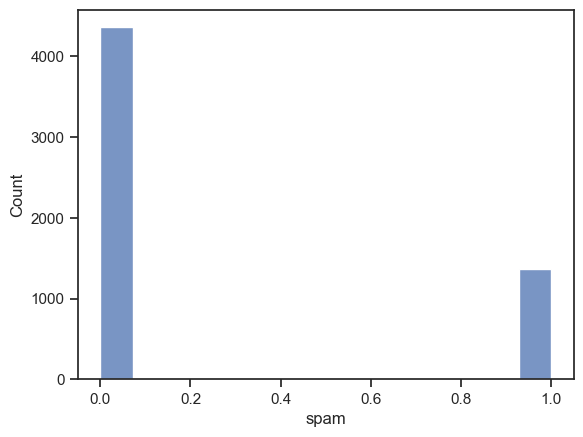

In [22]:
sns.histplot(df['spam'])

## 4. Exploratory Data Analysis (EDA)

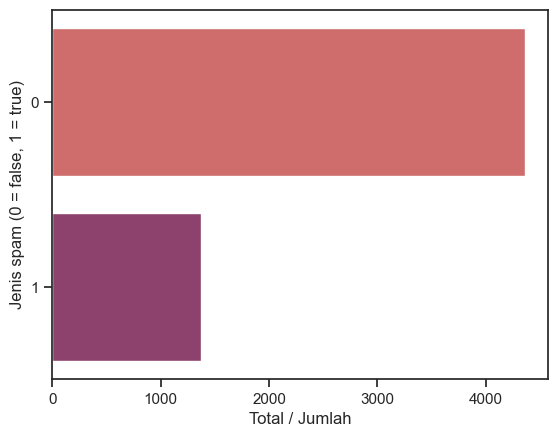

In [23]:
sns.set_theme(style='ticks')
sns.countplot(y='spam', data=df, hue='spam', palette='flare', legend=False)
plt.ylabel('Jenis spam (0 = false, 1 = true)')
plt.xlabel('Total / Jumlah')
plt.show()

## 5. Data Preparation

In [24]:
df.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [25]:
X = df['text']
y = df['spam']

print('X: ', X.shape)
print('y: ', y.shape)
print(y)

X:  (5728,)
y:  (5728,)
0       1
1       1
2       1
3       1
4       1
       ..
5723    0
5724    0
5725    0
5726    0
5727    0
Name: spam, Length: 5728, dtype: int64


In [26]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 3)

In [27]:
print(f'x_train: {x_train.shape}')
print(f'x_test: {x_test.shape}')
print(f'y_train: {y_train.shape}')
print(f'y_test: {y_test.shape}')

x_train: (4582,)
x_test: (1146,)
y_train: (4582,)
y_test: (1146,)


In [28]:
feature_extraction = TfidfVectorizer(min_df = 1, stop_words = 'english', lowercase =True)

x_train_features = feature_extraction.fit_transform(x_train)
x_test_features = feature_extraction.transform(x_test)

In [29]:
print(x_test_features)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 96046 stored elements and shape (1146, 33374)>
  Coords	Values
  (0, 277)	0.043555404573021865
  (0, 385)	0.03807869771583104
  (0, 829)	0.030629668674599216
  (0, 1078)	0.053519190750863505
  (0, 1579)	0.06801403999610467
  (0, 1777)	0.05673505171945819
  (0, 3630)	0.07648069536822642
  (0, 4319)	0.15243771483818672
  (0, 4392)	0.08700647364503745
  (0, 4417)	0.08399321012730711
  (0, 4555)	0.08311742981692649
  (0, 4713)	0.08757830497738221
  (0, 4853)	0.0649171745712057
  (0, 4996)	0.17924494571156568
  (0, 5105)	0.11561590550772172
  (0, 6096)	0.10483807807749669
  (0, 6188)	0.0674479863179651
  (0, 6606)	0.07106779722650768
  (0, 7182)	0.12238668455314088
  (0, 7292)	0.027622543385637036
  (0, 7793)	0.08077734915871242
  (0, 8406)	0.05753192564686462
  (0, 9036)	0.20836157896233876
  (0, 9650)	0.08700647364503745
  (0, 9735)	0.17198525142372784
  :	:
  (1144, 18481)	0.08263035457047513
  (1144, 18624)	0.0791779546805828

In [30]:
print(x_train)

5700    Subject: re : exploration data as the root of ...
5105    Subject: gas model  sorry so much time has pas...
5485    Subject: livelink access  - - - - - - - - - - ...
5192    Subject: re : video conference scheduling  hel...
2651    Subject: re : pending approval for ibuyit requ...
                              ...                        
789     Subject: cigarettes wholesale ! hywwzzlzd  $ 1...
968     Subject: i think you might be interested  hell...
1667    Subject: re : summer work . .  jinbaek ,  this...
3321    Subject: re : book for lacima course attendees...
1688    Subject: re : argentina modelling  michael ,  ...
Name: text, Length: 4582, dtype: object


In [31]:
print(x_train_features)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 408563 stored elements and shape (4582, 33374)>
  Coords	Values
  (0, 29045)	0.027350831183146494
  (0, 12734)	0.2731330732901836
  (0, 9702)	0.2434779314354512
  (0, 26414)	0.20469906162468185
  (0, 11945)	0.16768019627120936
  (0, 21847)	0.3221661388560145
  (0, 29259)	0.19594745660827412
  (0, 7447)	0.26830087740346925
  (0, 8787)	0.13947216511966962
  (0, 17361)	0.14810582386362775
  (0, 8653)	0.07145974179954041
  (0, 7094)	0.07086072273068604
  (0, 33101)	0.060807769107754726
  (0, 8799)	0.13947216511966962
  (0, 25415)	0.04547507625063386
  (0, 14190)	0.20469906162468185
  (0, 14051)	0.18776782473981463
  (0, 30580)	0.1357750225763003
  (0, 24306)	0.048890118949862775
  (0, 4932)	0.10871375473306225
  (0, 14192)	0.11948158504424808
  (0, 15229)	0.07973851459430858
  (0, 27608)	0.09497852966241772
  (0, 19873)	0.04042751503749571
  (0, 30155)	0.04986444772716652
  :	:
  (4581, 29985)	0.05731960277359003
  (4581, 2039)	

## 6. Modeling

In [32]:
model = LogisticRegression()

In [33]:
model.fit(x_train_features, y_train)

LogisticRegression()

In [34]:
prediction_on_training_data = model.predict(x_train_features)
accuracy_on_training_data = accuracy_score(y_train, prediction_on_training_data)

In [35]:
print('Acc on training data: ', accuracy_on_training_data)

Acc on training data:  0.9958533391532082


In [36]:
prediction_on_testing_data = model.predict(x_test_features)
accuracy_on_testing_data = accuracy_score(y_test, prediction_on_testing_data)

In [37]:
print('Acc on testing data: ', accuracy_on_testing_data)

Acc on testing data:  0.9834205933682374


## 7. Use test

In [38]:
input_your_mail = ["how Are you?"]

input_data_features = feature_extraction.transform(input_your_mail)
test_pred = model.predict(input_data_features)
print(test_pred)

if(test_pred[0]==1):
    print('Spam Mail')
else:
    print('not spam')

[0]
not spam


In [39]:
import joblib

# Simpan model
joblib.dump(model, "../model/spamcheck.joblib")
print("Model berhasil disimpan ke file '../model/spamcheck.joblib'")

Model berhasil disimpan ke file '../model/spamcheck.joblib'
